<a href="https://colab.research.google.com/github/ManasSatpute/Solar-Energy-Forecasting/blob/main/ai_solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# AI Based Solar Energy Generation Estimation

### Phases:
1. Data cleaning + processing

2. ML phase

3. Results + documentation + data analysis

### Steps:
1. Import [dataset](https://www.kaggle.com/anikannal/solar-power-generation-data) 
   from [kaggle](https://medium.com/@galhever/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2)

2. Modify and generate values for missing data


### Refrences
https://www.tensorflow.org/tutorials/keras/regression

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"kshitijkotasthane","key":"a24012320cf53d8e1c6485b74737329a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d anikannal/solar-power-generation-data

solar-power-generation-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 files		    kaggle.json   solar-power-generation-data.zip
'kaggle (1).json'   sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('solar-power-generation-data.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
import pandas as pd

df = pd.read_csv('/content/files/Plant_1_Generation_Data.csv')
df.describe

<bound method NDFrame.describe of               DATE_TIME  PLANT_ID  ... DAILY_YIELD  TOTAL_YIELD
0      15-05-2020 00:00   4135001  ...       0.000    6259559.0
1      15-05-2020 00:00   4135001  ...       0.000    6183645.0
2      15-05-2020 00:00   4135001  ...       0.000    6987759.0
3      15-05-2020 00:00   4135001  ...       0.000    7602960.0
4      15-05-2020 00:00   4135001  ...       0.000    7158964.0
...                 ...       ...  ...         ...          ...
68773  17-06-2020 23:45   4135001  ...    5967.000    7287002.0
68774  17-06-2020 23:45   4135001  ...    5147.625    7028601.0
68775  17-06-2020 23:45   4135001  ...    5819.000    7251204.0
68776  17-06-2020 23:45   4135001  ...    5817.000    6583369.0
68777  17-06-2020 23:45   4135001  ...    5910.000    7363272.0

[68778 rows x 7 columns]>

In [ ]:
df.shape

(68778, 7)

In [ ]:
df.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [ ]:
import numpy as np

# Remove redundant and zero value columns
df = df.replace(0.0, np.nan, inplace=False)
df = df.dropna()

In [ ]:
# Create a new data frame, consisting only of columns needed to generate predictions
extr_df = df[["DC_POWER", "AC_POWER", "DAILY_YIELD", "TOTAL_YIELD"]]
extr_df.iloc[0]

DC_POWER       2.780000e+02
AC_POWER       2.686250e+01
DAILY_YIELD    2.625000e+00
TOTAL_YIELD    6.259562e+06
Name: 531, dtype: float64

In [ ]:
# Combine the training features into one array

feats = []
for x, y in zip(df['AC_POWER'], df['DC_POWER']):
    feats.append((x,y))
feats = np.array(feats)
feats.reshape((len(feats), 2))

array([[ 26.8625    , 278.        ],
       [ 30.01428571, 310.5714286 ],
       [ 30.775     , 318.625     ],
       ...,
       [  7.47142857,  77.42857143],
       [  7.22857143,  74.85714286],
       [  7.48571429,  77.71428571]])

In [ ]:
# Repeat the above procedure for the labels

labels = []
for _ in df['TOTAL_YIELD']:
    labels.append(_)
labels = np.array(labels)
labels.reshape((len(labels), 1))

array([[6259561.625],
       [6183648.   ],
       [6987762.5  ],
       ...,
       [7251203.429],
       [6583368.143],
       [7363271.143]])

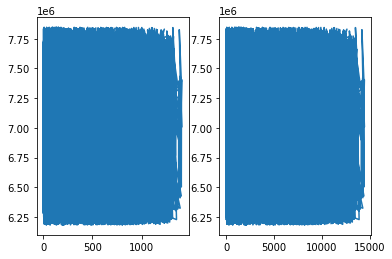

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(feats[:,0], labels)

plt.subplot(1,2,2)
plt.plot(feats[:,1], labels)

In [ ]:
# Split the total data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feats,
                                                    labels,
                                                    test_size=0.20,
                                                    random_state=42)

In [ ]:
# Now we build the model using tensorflow

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


print(f'Tensorflow version - {tf.__version__}')

tot = []
for x, y in zip(df['AC_POWER'], df['DC_POWER']):
    tot.append(x+y)

solar = np.array(tot) 
solar_normalizer = preprocessing.Normalization(input_shape=[1,])
solar_normalizer.adapt(solar)

solar_model = tf.keras.Sequential([solar_normalizer, layers.Dense(units=1)])
solar_model.summary()

solar_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),loss='mean_absolute_error')


Tensorflow version - 2.4.1
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


        loss   val_loss  epoch
5  6951828.5  7075285.5      5
6  6951731.5  7075197.5      6
7  6951637.5  7075105.5      7
8  6951549.5  7075018.0      8
9  6951452.0  7074929.0      9


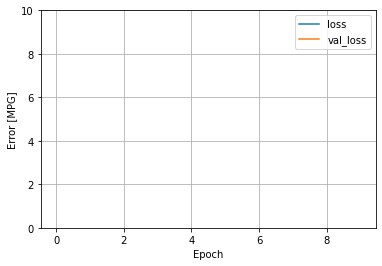

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

tf.config.run_functions_eagerly(True)

tot = np.array(tot)

history = solar_model.fit(
    tot, labels,
    epochs=10,
    verbose=0,
    validation_split = 0.2)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

plot_loss(history)